# Visualization


In [44]:
import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from geopy.geocoders import Nominatim
from matplotlib.colors import ListedColormap
from tqdm import tqdm

plt.style.use("dark_background")

### Coloring Methods


In [45]:
def get_alpha_blend_cmap(cmap: str, alpha: float):
    cls = plt.get_cmap(cmap)(np.linspace(0, 1, 256))
    cls = (1-alpha) + alpha*cls
    return ListedColormap(cls)


def get_color_palette_from_cmap(cmap_label: str, cmap_width: int, range_width: int, reversed: bool):
    colors = []
    cmap = plt.get_cmap(cmap_label, cmap_width)

    color_range = range(cmap_width - 1, cmap_width -
                        range_width - 1, -1) if reversed else range(range_width)
    for i in color_range:
        colors.append(cmap(i))
    return colors


def get_plot_kws(scatter_kws: str, line_kws: str):
    return {'line_kws': {'color': line_kws}, 'scatter_kws': {'color': scatter_kws}}


### Read Processed Data


In [46]:
listings_df = pd.read_csv('../data/processed/processed_listings.csv')
listings_df.head(10)


,Subtype,Style,Living Area,Lot Dimensions,Bedrooms,Bathrooms,Levels,Listing Date,Listing Year,Year of Construction,Location,RCM,Region,Price
0,Bungalow,Unknown,888,9522,2,1,1,2021-11-01,2021,2018,Les Maskoutains & Acton,Acton,Montérégie,355000
1,Bungalow,Open area,1440,11900,4,2,1,2021-11-01,2021,2015,Les Maskoutains & Acton,Acton,Montérégie,389000
2,1 1/2 Storey,Cathedral roof,862,9522,2,1,2,2021-06-01,2021,1990,Les Maskoutains & Acton,Acton,Montérégie,549000
3,Bungalow,Mid-level entrance,1100,9500,3,1,1,2021-06-01,2021,1972,Les Maskoutains & Acton,Acton,Montérégie,240000
4,Semi-detached,New construction,960,8218,2,1,1,2021-06-01,2021,2020,Les Maskoutains & Acton,Acton,Montérégie,275000
5,2 Storey,2 storey,1418,8824,4,1,2,2021-06-01,2021,2007,Les Maskoutains & Acton,Acton,Montérégie,375000
6,1 1/2 Storey,Detached,1443,12071,4,1,2,2021-03-01,2021,1990,Les Maskoutains & Acton,Acton,Montérégie,170000
7,1 1/2 Storey,Canadian,1017,53819,3,2,2,2021-05-01,2021,1973,Les Maskoutains & Acton,Acton,Montérégie,264000
8,2 Storey,Canadian,1904,39200,3,2,2,2021-03-01,2021,1985,Les Maskoutains & Acton,Acton,Montérégie,290000
9,2 Storey,2 storey,1548,28378,4,2,2,2021-05-01,2021,1974,Les Maskoutains & Acton,Acton,Montérégie,390000


### Correlation Map


In [47]:
def plot_corr_map(df):
    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    _, _ = plt.subplots(figsize=(11, 9))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, vmax=.3, cmap=get_alpha_blend_cmap("rocket_r", 0.9), center=0,
                square=True, linewidths=0, cbar_kws={"shrink": .5})


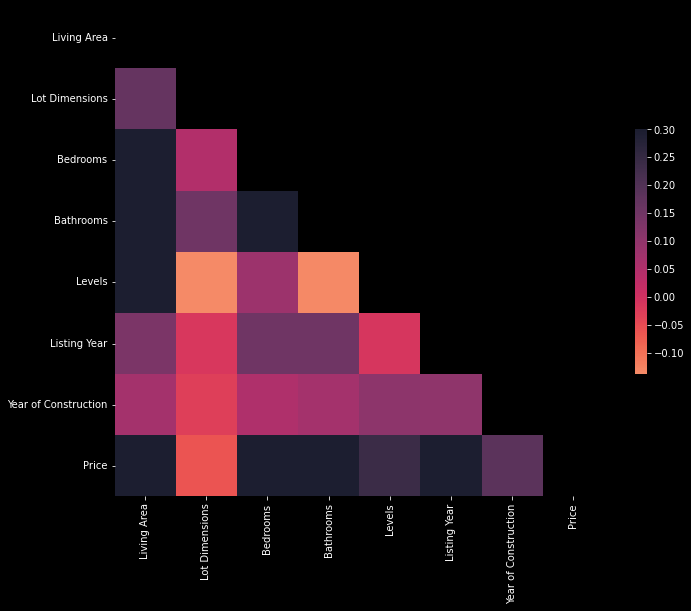

In [48]:
plot_corr_map(listings_df)


## Price


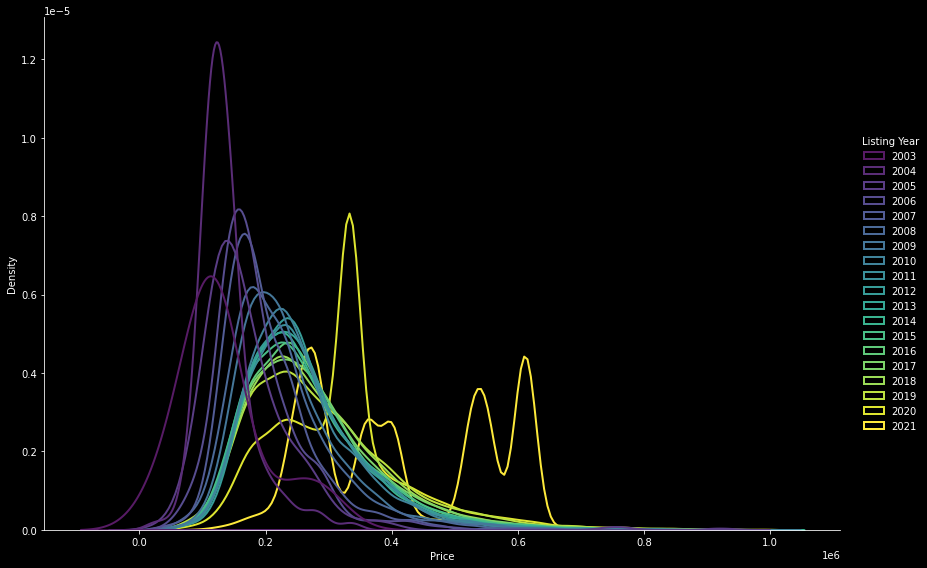

In [49]:
sns.displot(listings_df, x='Price', hue='Listing Year', kind="kde", fill=True, common_norm=False,
            height=8, aspect=1.5, alpha=.0, linewidth=2, palette=get_alpha_blend_cmap("viridis", 0.9))


## Listing Year


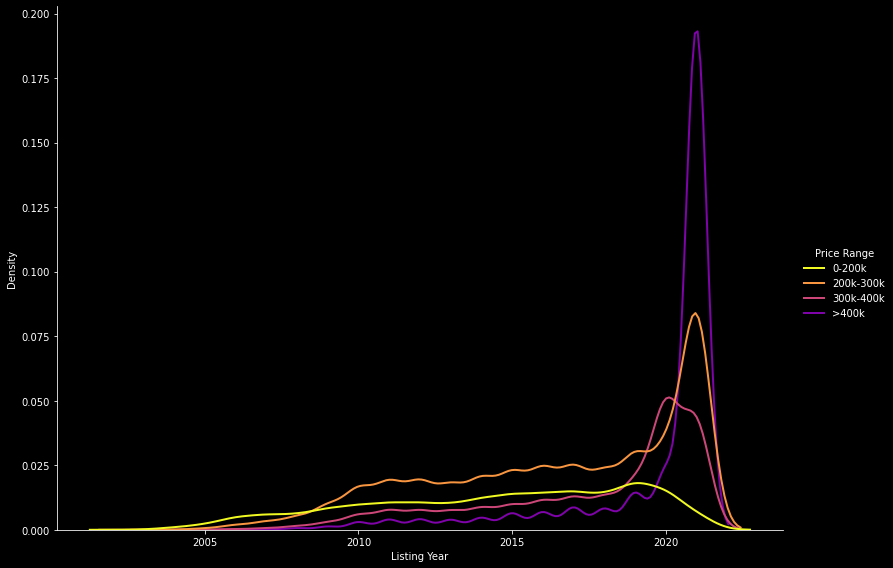

In [50]:
conditions = [(listings_df['Price'] >= 0) & (listings_df['Price'] < 200000), (listings_df['Price'] >= 200000) & (
    listings_df['Price'] < 300000), (listings_df['Price'] >= 300000) & (listings_df['Price'] < 400000), listings_df['Price'] >= 400000]
values = ['0-200k', '200k-300k', '300k-400k', '>400k']

listings_df['Price Range'] = np.select(conditions, values, default=0)

sns.displot(listings_df, x='Listing Year', hue='Price Range', hue_order=values, kind="kde", common_norm=True,
            height=8, aspect=1.4, linewidth=2, palette=get_color_palette_from_cmap("plasma", 5, 4, True))


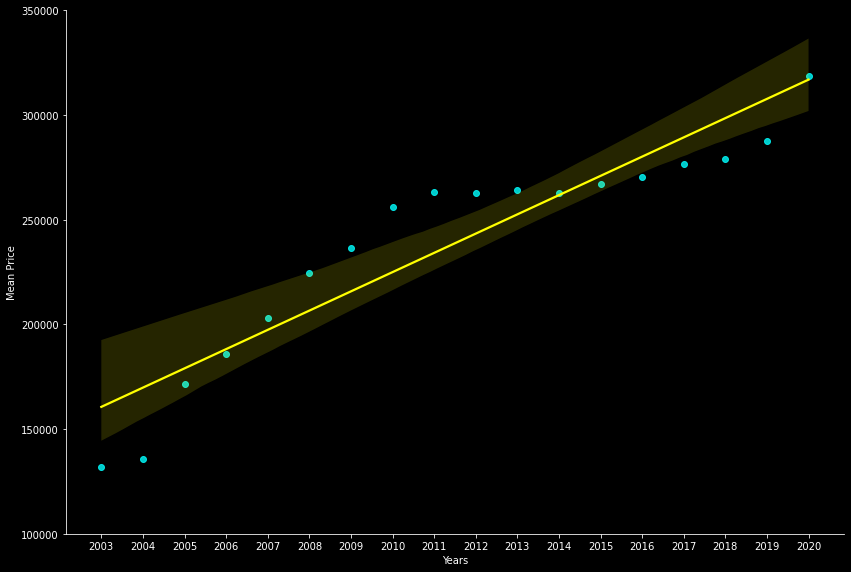

In [51]:
mean_Prices = []

min_y = min(listings_df['Listing Year'].unique())
max_y = max(listings_df['Listing Year'].unique())
years = range(min_y, max_y)

for y in years:
    mean_Prices.append(
        listings_df[listings_df['Listing Year'] == y]['Price'].mean())

df = pd.DataFrame(list(zip(years, mean_Prices)),
                  columns=['Years', 'Mean Price'])

s = sns.pairplot(data=df, x_vars='Years', y_vars='Mean Price', kind="reg",
                 height=8, aspect=1.5, plot_kws=get_plot_kws('cyan', 'yellow'))
s.set(xticks=years, yticks=range(100000, 400000, 50000))


## Living Area


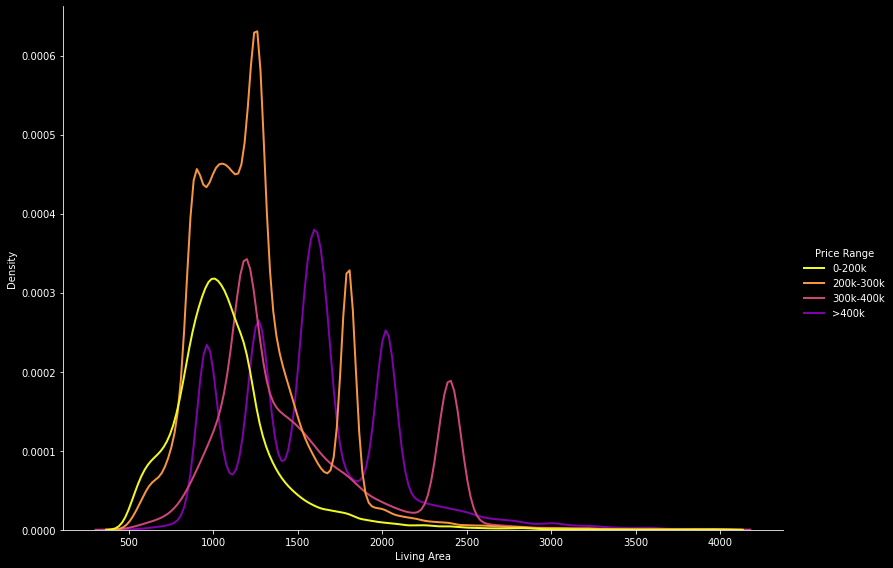

In [52]:
sns.displot(listings_df, x='Living Area', hue='Price Range', hue_order=values, kind="kde", common_norm=True,
            height=8, aspect=1.4, linewidth=2, palette=get_color_palette_from_cmap("plasma", 5, 4, True))


In [53]:
listings_df


,Subtype,Style,Living Area,Lot Dimensions,Bedrooms,Bathrooms,Levels,Listing Date,Listing Year,Year of Construction,Location,RCM,Region,Price,Price Range
0,Bungalow,Unknown,888,9522,2,1,1,2021-11-01,2021,2018,Les Maskoutains & Acton,Acton,Montérégie,355000,300k-400k
1,Bungalow,Open area,1440,11900,4,2,1,2021-11-01,2021,2015,Les Maskoutains & Acton,Acton,Montérégie,389000,300k-400k
2,1 1/2 Storey,Cathedral roof,862,9522,2,1,2,2021-06-01,2021,1990,Les Maskoutains & Acton,Acton,Montérégie,549000,>400k
3,Bungalow,Mid-level entrance,1100,9500,3,1,1,2021-06-01,2021,1972,Les Maskoutains & Acton,Acton,Montérégie,240000,200k-300k
4,Semi-detached,New construction,960,8218,2,1,1,2021-06-01,2021,2020,Les Maskoutains & Acton,Acton,Montérégie,275000,200k-300k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126742,Bungalow,Waterfront,1173,21008,2,2,1,2008-05-01,2008,1965,Le Val-Saint-François & Les Sources,Le Val-Saint-François,Estrie,215000,200k-300k
126743,2 Storey,De Prestige,2880,12000,4,1,2,2006-08-01,2006,1993,Le Val-Saint-François & Les Sources,Le Val-Saint-François,Estrie,198000,0-200k
126744,Condominium,Unknown,930,9522,1,1,1,2020-11-01,2020,2013,Le Val-Saint-François & Les Sources,Le Val-Saint-François,Estrie,156000,0-200k
126745,Condominium,Open area,1200,40041,3,1,1,2018-07-01,2018,2010,Le Val-Saint-François & Les Sources,Le Val-Saint-François,Estrie,213500,200k-300k


ConversionError: Failed to convert value(s) to axis units: ['500-1000 sq.ft', '1000-2000 sq.ft', '2000-2500 sq.ft', '>2500 sq.ft']

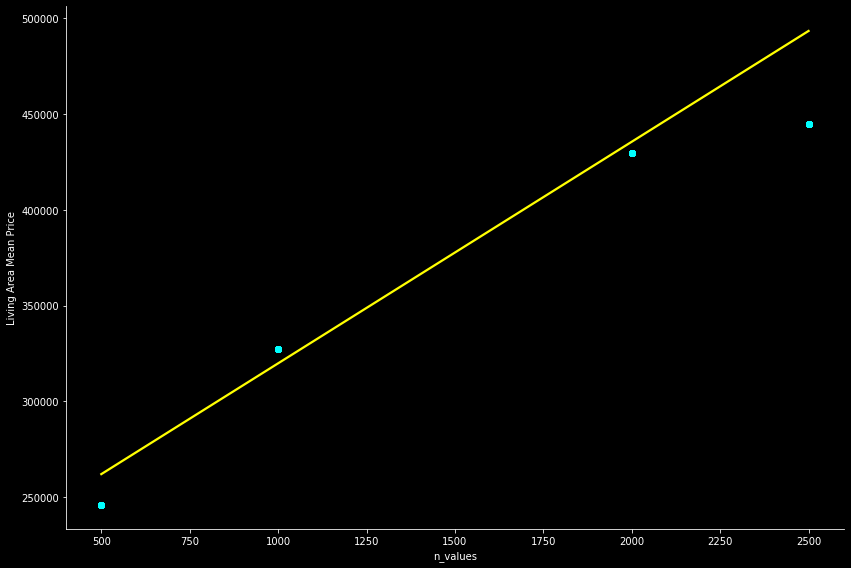

In [54]:
conditions = [(listings_df['Living Area'] >= 500) & (listings_df['Living Area'] < 1000), (listings_df['Living Area'] >= 1000) & (
    listings_df['Living Area'] < 2000), (listings_df['Living Area'] >= 2000) & (listings_df['Living Area'] < 2500), listings_df['Living Area'] >= 2500]
values = ['500-1000 sq.ft', '1000-2000 sq.ft',
          '2000-2500 sq.ft', '>2500 sq.ft']
n_values = [500, 1000, 2000, 2500]
listings_df['Living Area Range'] = np.select(conditions, values, default=0)
listings_df['n_values'] = np.select(conditions, n_values, default=0)

listings_df['Living Area Mean Price'] = 0

for y in values:
    listings_df.loc[listings_df['Living Area Range'] == y,
                    'Living Area Mean Price'] = listings_df[listings_df['Living Area Range'] == y]['Price'].mean()

s = sns.pairplot(data=listings_df, x_vars='n_values', y_vars='Living Area Mean Price',
                 kind="reg", height=8, aspect=1.5, plot_kws=get_plot_kws('cyan', 'yellow'))
s.set(xticks=values, yticks=range(100000, 400000, 50000))
